# Для colab 

In [1]:
# обновляем fast.ai
!curl https://course.fast.ai/setup/colab | bash
# подключаемся 
from google.colab import drive
drive.mount('/gdrive/')

# загружаем данные на colab
!unzip -q /gdrive/My\ Drive/simpsons/data/simpsons4.zip -d data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    815      0 --:--:-- --:--:-- --:--:--   813
Updating fastai...
Done.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/


In [0]:
# импортируем все!
from fastai.vision import *


# Подготовка данных

In [0]:
# где лежат данные
path = Path('data')
# запрещаем аугументацию - вредная вещь ;)
ds_tfms=get_transforms(do_flip=False)
# зануляем valid, чтобы не было переобучения ;)
data = ImageDataBunch.from_folder(path, ds_tfms=ds_tfms,size=224, valid_pct=0.,test='testset')\
                  .normalize(imagenet_stats)

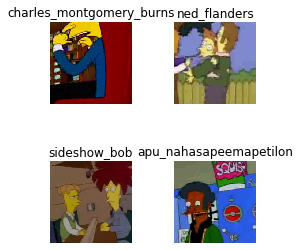

In [87]:
# можно посмотреть часть от  batch
data.show_batch(rows=2, figsize=(4,4))

# Выбираем приличную модель - resnet34

In [156]:
learn = cnn_learner(data, models.resnet34)
# модель будем полностью переобучать
learn.unfreeze() 
# обучение: чем больше эпох, тем лучше ;)

learn.fit(10,1e-3)
# для надежности повторим обучение еще раз
learn.fit(10,1e-4)


epoch,train_loss,valid_loss,time
0,0.727718,#na#,04:32
1,0.543571,#na#,04:30
2,0.402371,#na#,04:30
3,0.315690,#na#,04:30
4,0.285777,#na#,04:29
5,0.216985,#na#,04:28
6,0.197407,#na#,04:27
7,0.172747,#na#,04:27
8,0.176378,#na#,04:27
9,0.151726,#na#,04:29


epoch,train_loss,valid_loss,time
0,0.067252,#na#,04:31
1,0.061155,#na#,04:35
2,0.055747,#na#,04:35
3,0.046287,#na#,04:29
4,0.029930,#na#,04:30
5,0.034929,#na#,04:31
6,0.039333,#na#,04:41
7,0.028494,#na#,04:38
8,0.031856,#na#,04:35
9,0.029848,#na#,04:38


In [157]:
# предсказания
preds, _ = learn.get_preds(DatasetType.Test)
y = torch.argmax(preds, dim=1)


In [0]:
# подготавливаем данные в нужном формате
res=np.asarray(list(zip(map(lambda x: x.name, data.test_ds.x.items),np.asarray(data.classes)[y])))
df = pd.DataFrame(res,columns=['Id','Expected'])


In [0]:
# загружаем образец
submit = pd.read_csv("data/sample_submission.csv").drop(['Expected'], axis='columns')
# добавляем предсказание
submit = pd.merge(submit,df,on='Id')

In [0]:
# сохраняем csv для загрузки на Kaggle в Google Drive
submit.to_csv("/gdrive/My Drive/DeepLearning2019/kaggle/result_10_ballov.csv", index=False)


# отправляем  на Kaggle и получаем score 0.997 ± 0.003

PS Если сразу не получили score=1.0, есть вероятность, что это будет при следующем расчете ;)